# PyTorch vs. TensorFlow
PyTorch and TensorFlow are two of the most popular open-source machine learning frameworks used for deep learning research and development.

One of the main differences between PyTorch and TensorFlow is their approach to building and training deep learning models. PyTorch is considered to be more "Pythonic" in its approach, meaning that it uses a dynamic computation graph that is defined on-the-fly during execution, which makes it easier to write and debug code. TensorFlow, on the other hand, uses a static computation graph that must be defined before execution, which can make it more efficient for large-scale models but can also make it more challenging to write and debug code.

Another difference between the two frameworks is their popularity and user community. TensorFlow has a larger user base and more extensive documentation and support, making it an excellent choice for beginners or those looking for robust support. PyTorch, on the other hand, has gained significant popularity in recent years, especially among the research community, due to its flexibility and ease of use.

Overall, both frameworks are excellent choices for building deep learning models, and the choice between them often comes down to personal preference and the specific needs of your project.

## Derivitives in PyTorch



In [71]:
import torch 
%matplotlib inline

x = torch.tensor([[2.0, 3.0, 4.0],[1.0, 0.5, 3.5]], requires_grad=True)
y = torch.tensor([[-1.0, 0.0],[0.0, 0.5],[2.5, 3.5]], requires_grad=True)
z = torch.tensor([[1.0, 0.0, 9.0],[3.0, 0.5, 3.5]], requires_grad=True)
dot_prod = torch.mm(x, y)
ele_prod = x * z
print("dot_prod: ", dot_prod)
print("ele_prod: ", ele_prod)

dot_prod:  tensor([[ 8.0000, 15.5000],
        [ 7.7500, 12.5000]], grad_fn=<MmBackward0>)
ele_prod:  tensor([[ 2.0000,  0.0000, 36.0000],
        [ 3.0000,  0.2500, 12.2500]], grad_fn=<MulBackward0>)


### Information stored in Tensors
Tensors contain the following information
- Data = data stored in tensor
- grad_fn = graph of computations performed on tensor to calculate derivitive
- grad = the calulated derivitive of the tensor
- id_leaf = is the tensor a leaf tensor?
- requires_grad = should the grad be stored and calculated for this tensor?

Great, now to calculate the derivitive of a scaler tensor call the .backward() function

In [72]:
scaler_t = torch.tensor(2.0, requires_grad=True)
scaler_squared = scaler_t**2
# calculate back prop
scaler_squared.backward()
# print out the derivitive
print(scaler_t.grad)
# as the derivitive of a x squared is 2x, 4 should be our derivitive

tensor(4.)


## Simple Dataset
To use datasets in pytorch you have to import the class Dataset

In [73]:
from torch.utils.data import Dataset

# this new class is now inherits from Dataset
class toy_set(Dataset):
    def __init__(self, length=100, transform=None):
        self.x = 2*torch.ones(length, 2)
        self.y = torch.ones(length, 1)

        self.len = length
        self.transform = transform

    def __getitem__(self, index):
        sample = (self.x[index], self.y[index])
        if self.transform:
            sample = self.transform(sample)
        return sample

    def __len__(self):
        return self.len

dataset = toy_set()
print(dataset[0])
print(dataset[90])



(tensor([2., 2.]), tensor([1.]))
(tensor([2., 2.]), tensor([1.]))


In [74]:

class add_mult(object):
    def __init__(self, addx=1, multy=2):
        self.addx = addx
        self.multy = multy
    def __call__(self, sample):
        x = sample[0]
        y = sample[1]
        x = x + self.addx
        y = y * self.multy
        sample = x, y
        return sample

# One way we can use this function
a_m = add_mult(addx=6, multy=3)
print(dataset[0])
x_, y_ = a_m(dataset[0])
print(x_, y_)

(tensor([2., 2.]), tensor([1.]))
tensor([8., 8.]) tensor([3.])


In [75]:
# another way we can use this function is by passing the a_m class into the dataset class
# using the keyword trandform which will call sample=self.transform(sample) according to 
# our class definition
dataset_ = toy_set(transform=a_m)
print(dataset[10])
print(dataset_[10])

(tensor([2., 2.]), tensor([1.]))
(tensor([8., 8.]), tensor([3.]))


In [76]:
# You can also pass multiple functions using the tranforms function from pytorch like so
from torchvision import transforms

data_transformer = transforms.Compose([add_mult(), add_mult(),add_mult(addx=10,multy=7)])
transformed_data_ = data_transformer(dataset[10])
print(dataset[10])
print(transformed_data_)

(tensor([2., 2.]), tensor([1.]))
(tensor([14., 14.]), tensor([28.]))


In [77]:
# Dataset for images
from PIL import Image
import pandas as pd
import os
from matplotlib.pyplot import imshow
from torch.utils.data import Dataset, DataLoader

# Import the dataset of clothing images
directory = "data"
csv_file = "avocado.csv"
os.listdir(directory)
csv_path = os.path.join(directory, csv_file)

# Convert the csv file into a dataframe using pandas
data_frame = pd.read_csv(csv_path)

# View part of the dataframe
print(data_frame.head())

# Access elements within the dataframe
print("File name ", data_frame.iloc[1,1])
print("Class or y ", data_frame.iloc[1,0])
image_name = data_frame.iloc[1,1]
image_path = os.path.join(directory, image_name)

   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015 

In [78]:
# Displaying Images in the Dataset
image = Image.open(image_path)
plt.imshow(image,cmap='grey', vmin=0, vmax=255)
plt.title(data_frame.iloc[1,0])
ply.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/2015-12-20'

In [ ]:
# Transformations On Images
import torchvision.transforms as transforms

# Take the center 20x20 pixels?
transforms.CenterCrop(20)
# convert image to tensor
transforms.ToTensor()

croptensor_data_transform = transforms.Compose([transforms.CenterCrop(20), transforms.ToTensor()])
dataset = Dataset(csv_file=csv_file, data_dir=directory, transform=croptensor_data_transform)
print(dataset[0][0].shape)
torch.Size([1, 20, 20])


ToTensor()

In [ ]:
# importing datasets form PyTorch
from torchvision import datasets as dsets
dataset_test = dsets.MNIST(root="./data", train=False, download=True, transform=transforms.ToTensor())
dataset_train = dsets.MNIST(root="./data", train=True, download=True, transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:01<00:00, 6215721.42it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 1547427.17it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 3848696.12it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 484684.61it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Linear Regression Prediction (1D) in PyTorch
Predicting label of y to input data of x using a linear model of:
y = wx + b

In [ ]:
# Weights
w = torch.tensor(2.0, requires_grad=True)
# bias
b = torch.tensor(-1.0, requires_grad=True)
# forward prop
def forward(x):
    y = w * x + b
    return y

# apply forward to 1d tensor with one value
x = torch.tensor([1.0])
yhat = forward(x)
print(yhat)

# apply forward to 1d tensor with 3 vlaues
x = torch.tensor([[1.0],[1.5],[2.0]])
yhat = forward(x)
print(yhat)


tensor([1.], grad_fn=<AddBackward0>)
tensor([[1.],
        [2.],
        [3.]], grad_fn=<AddBackward0>)


In [ ]:
from torch.nn import Linear

# set seed manually to get same results
torch.manual_seed(1)
# create a linear classifier model
model = Linear(in_features=1, out_features=1)
# input our data into the model
y = model(x)
# we can look at the parameters of the model using this code
print("parameters (w,b): ", list(model.parameters())) 
yhat = model(x)
print("parameters (w,b): ", list(model.parameters())) 

parameters (w,b):  [Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]
parameters (w,b):  [Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [86]:
# Creating custom Models in PyTorch
import torch.nn as nn

class LR(nn.Module):
    def __init__(self, input_size, output_size):
        # calls the initialization function for the parent class nn.Module
        super(LR, self).__init__()
        self.linear = nn.Linear(in_size, output_size)

    def forward(self, x):
        out = self.linear(x)
        return out

model = LR(10,1)

# we can use this code to manually change the value of our parameters
model.state_dict()['linear.weight'].data[0] = torch.tensor([0.5153])
model.state_dict()['linear.bias'].data[0] = torch.tensor([-0.4414])

# print new parameters (this is possible because the model is subclass of nn.module)
print(list(model.parameters()))
x = torch.tensor([1.0])
yhat = model(x)
print("yhat: ", yhat)
x = torch.tensor([[1.0], [2.0]])
yhats = model(x)
print("yhats : ", yhats)

"""
IMPORTANT - When you pass a tensor into a model(x) you are
 calling the forward() function with the tensor as an argument
"""
# the .state_dict() function is useful as it returns the parameters as a dictionary
print(model.state_dict())
print(model.state_dict().keys())
print(model.state_dict().values())

NameError: name 'in_size' is not defined

torch.Size([60])
torch.Size([60, 1])


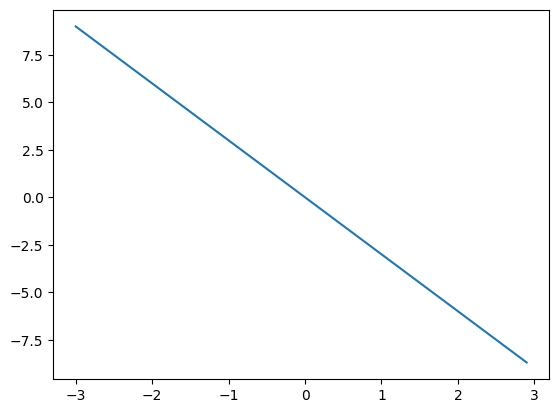

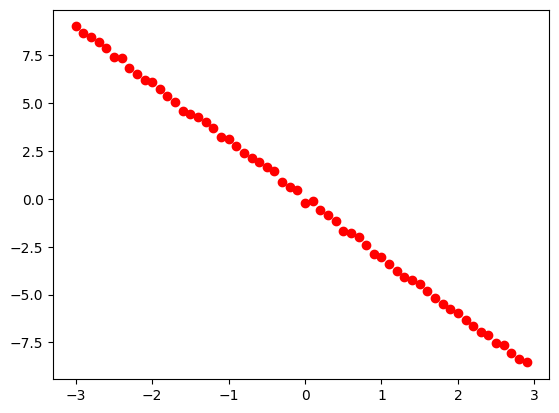

In [87]:
# Training our Model
# Linear Models assume the use of Gaussian noise
# Lets first calculate loss by subtracting our yhat 
# prediction from the label y and squaring the result (y-yhat)**2
# this equates to (y1 - w * x1)**2 for linear regression for w
# this equates to (y1 - x1 + b)**2 for linear regression for b

# Gradient Descent
# The derivitive that you get is the opposite sign as the 
# direction you wan to move your parameters to minimize loss
# Cost is the sum of the loss or the average loss depending on what 
# approach you choose


# Sweet, now lets conduct Gradient descent in PyTorch!
X = torch.arange(-3,3,0.1)
print(X.shape)
# add one dimension to the end of the tensor
X = X.view(-1, 1)
f = -3 * X
print(X.shape)

import matplotlib.pyplot as plt

plt.plot(X.numpy(), f.numpy())
plt.show()

Y = f+0.1*torch.randn(X.size())

plt.plot(X.numpy(), Y.numpy(), 'ro')
plt.show()

# Stochastic Gradient Descent (as opposed to batch)
While we calculate our cost function for batch gradient descent on a batch of examples (often the entire training set), with stochastic gradient descent we calculate cost and perform gradient descent on each sample one at a time.

There are several reasons why you might prefer stochastic gradient descent (SGD) over batch gradient descent (BGD):
- Computational efficiency: SGD is more computationally efficient than BGD because it updates the parameters of the model more frequently, based on each individual training example, rather than waiting to accumulate gradients across a large batch of examples before updating.
- Better generalization: SGD can sometimes result in better generalization because it introduces more randomness into the learning process, which can help the model avoid getting stuck in local minima. In contrast, BGD can sometimes overfit to the training data by updating the parameters in the same direction across many similar examples.
- Ability to handle large datasets: SGD is particularly useful for large datasets because it can learn from small subsets of the data at a time. This is often necessary because storing and processing large datasets can be memory-intensive and time-consuming.
- Ease of implementation: SGD is relatively easy to implement and tune, since it only requires setting a few hyperparameters, such as the learning rate and the number of epochs.

Overall, SGD can be a good choice for training deep learning models, especially when working with large datasets or when computational efficiency is a concern. However, it's important to note that SGD can also have some downsides, such as slower convergence and more difficulty in finding the optimal hyperparameters.

In [88]:
# DataLoaders are container you place dataframes inside of to 
# extend the functionality of your dataframe

# this would function similar to stochastic gradient descent
trainloader_stochastic = DataLoader(dataset=X, batch_size=1)

# this would function similar to mini-batch gradient descent
trainloader_mini_batch = DataLoader(dataset=dataset, batch_size=10)

# this would function similar to batch gradient descent
trainloader_batch = DataLoader(dataset=dataset, batch_size=dataset.len)

In [89]:
# Optimization in PyTorch
from torch import nn, optim

# Create an optimizer object for Stochastic Gradient Descent
# Tell it to optimize the paramters (w,b) of model and give it 
# a learning rate of 0.01
optimizer = optim.SGD(model.parameters(), lr=0.01)
print(optimizer.state_dict())

for epoch in range(100):
    for x,y in trainloader_mini_batch:
        yhat = model(x)
        loss = criterion(yhat, y)
        optimizer.zero_grad()
        loss.backward()
        # .step() updates the parameters
        optimizer.step()

{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'params': [0, 1]}]}


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10x2 and 1x1)